In [38]:
import numpy as np
import pandas as pd

import keras as ks
#from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import tensorflow as tn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words = 10000)

In [7]:
print(train_data.shape)
print(train_data.shape)

(25000,)
(25000,)


In [8]:
print(np.max(np.max(train_data)))

9995


In [9]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 2s 1us/step


In [12]:
#print(word_index[])
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

In [15]:
decoded_review = " ".join([reverse_word_index.get(i, "?") for i in train_data[0]])
decoded_review

"the no was stupid great for was mystery characters movie is and of how 10 from why it when people have two br should to should on more he is stars br words scene greedy more it of and lack for always his life that to marriage was universal only sorts classes was after follows of on this 20 comedy and for if look were asks shotgun was after at dead hilarity in character her from well fat only middle marriage was same except superman new of johansson really it of went br you was story answers used dead of moves not travel in typical scene and of hunter most as genuine commercial fact it has movie hero movie is setting br and i i incredible much doom dressed of johansson quest are is herself br said during doing al are is considered in so unconvincing johansson are is blonde in also sharks seeking to encounter and not guys best lead when involved couple is save br and brendan exceedingly forgiven or of and like battlefield in glad of production better by who by this need fact on busy int

In [27]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [28]:
x_train = vectorize_sequence(train_data)

In [31]:
x_train

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.]])

In [32]:
print(train_labels)

[0 1 1 ..., 0 1 1]


The labels show if the review is good or bad. Good is 1, bad is 0.
The data is balanced, 50% good, 50% bad labels. (Not skewed.)

In [34]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [36]:
print(y_train)
print(y_test)


[ 0.  1.  1. ...,  0.  1.  1.]
[ 0.  0.  0. ...,  1.  0.  0.]


In [45]:
model = ks.models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [72]:
#ks.losses
#ks.

model.compile(
    optimizer = "rmsprop",
    loss= "binary_crossentropy",
    metric=["accuracy"]
    )


model.compile(
    optimizer = ks.optimizers.RMSprop(lr=0.001),
    loss= ks.losses.binary_crossentropy,
    metrics=[ks.metrics.binary_accuracy],
    )

In [73]:
print(model)

In [74]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [75]:
history = model.fit(
    partial_x_train,partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val,y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 309us/step - loss: 0.4975 - binary_accuracy: 0.7922 - val_loss: 0.3693 - val_binary_accuracy: 0.8805
Epoch 2/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.2932 - binary_accuracy: 0.9033 - val_loss: 0.3091 - val_binary_accuracy: 0.8821
Epoch 3/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.2139 - binary_accuracy: 0.9305 - val_loss: 0.3001 - val_binary_accuracy: 0.8800
Epoch 4/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.1737 - binary_accuracy: 0.9442 - val_loss: 0.2818 - val_binary_accuracy: 0.8891
Epoch 5/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1394 - binary_accuracy: 0.9567 - val_loss: 0.3114 - val_binary_accuracy: 0.8791
Epoch 6/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.1168 - binary_accuracy: 0.9641 - val_loss: 0.3256 - val_bi

In [82]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

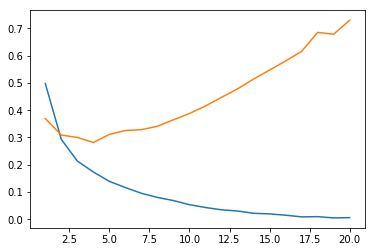

In [84]:
plt.plot(epochs, loss_values,)
plt.plot(epochs, val_loss_values,)

In [91]:
for k in history.history:
    print(k)

val_loss
val_binary_accuracy
loss
binary_accuracy


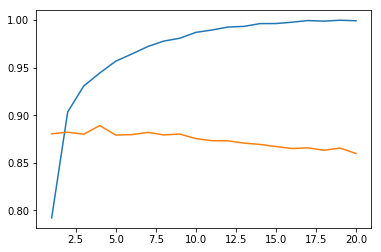

In [95]:
plt.clf()
history_dict = history.history
plt.plot(epochs,  history_dict['binary_accuracy'])
plt.plot(epochs,  history_dict['val_binary_accuracy'])

# Test 1: Number of hidden layers

In [115]:
model = ks.models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer = ks.optimizers.RMSprop(lr=0.001),
    loss= ks.losses.binary_crossentropy,
    metrics=[ks.metrics.binary_accuracy],
    )


history = model.fit(
    partial_x_train,partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val,y_val)
)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 249us/step - loss: 0.5330 - binary_accuracy: 0.7724 - val_loss: 0.3772 - val_binary_accuracy: 0.8772
Epoch 2/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.2984 - binary_accuracy: 0.9010 - val_loss: 0.2934 - val_binary_accuracy: 0.8901
Epoch 3/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.2044 - binary_accuracy: 0.9304 - val_loss: 0.3036 - val_binary_accuracy: 0.8824
Epoch 4/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.1629 - binary_accuracy: 0.9433 - val_loss: 0.3165 - val_binary_accuracy: 0.8827
Epoch 5/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1171 - binary_accuracy: 0.9627 - val_loss: 0.3755 - val_binary_accuracy: 0.8694
Epoch 6/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.1023 - binary_accuracy: 0.9667 - val_loss: 0.4458 - val_bi

Text(0.5,0.98,'Hidden layers = 3, width = 16')

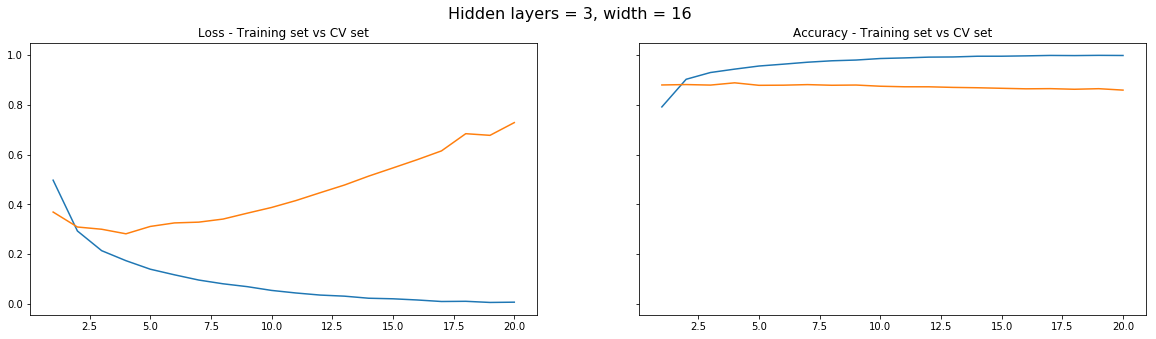

In [116]:
fig = plt.figure(figsize=(5,4))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5),sharey=True)
ax1.plot(epochs,  history_dict['loss'])
ax1.plot(epochs,  history_dict['val_loss'])
ax1.set_title("Loss - Training set vs CV set")
ax2.plot(epochs,  history_dict['binary_accuracy'])
ax2.plot(epochs,  history_dict['val_binary_accuracy'])
ax2.set_title("Accuracy - Training set vs CV set")
plt.suptitle('Hidden layers = 3, width = 16', fontsize=16)


# Test 2: Number of hidden layers

In [113]:
model = ks.models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer = ks.optimizers.RMSprop(lr=0.001),
    loss= ks.losses.binary_crossentropy,
    metrics=[ks.metrics.binary_accuracy],
    )


history = model.fit(
    partial_x_train,partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val,y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 214us/step - loss: 0.5146 - binary_accuracy: 0.7805 - val_loss: 0.3675 - val_binary_accuracy: 0.8728
Epoch 2/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.2822 - binary_accuracy: 0.9060 - val_loss: 0.2918 - val_binary_accuracy: 0.8879
Epoch 3/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1999 - binary_accuracy: 0.9330 - val_loss: 0.2774 - val_binary_accuracy: 0.8909
Epoch 4/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.1556 - binary_accuracy: 0.9467 - val_loss: 0.2941 - val_binary_accuracy: 0.8856
Epoch 5/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.1213 - binary_accuracy: 0.9609 - val_loss: 0.3192 - val_binary_accuracy: 0.8825
Epoch 6/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.1038 - binary_accuracy: 0.9657 - val_loss: 0.3730 - val_bi

Text(0.5,0.98,'Hidden layers = 1, width = 64')

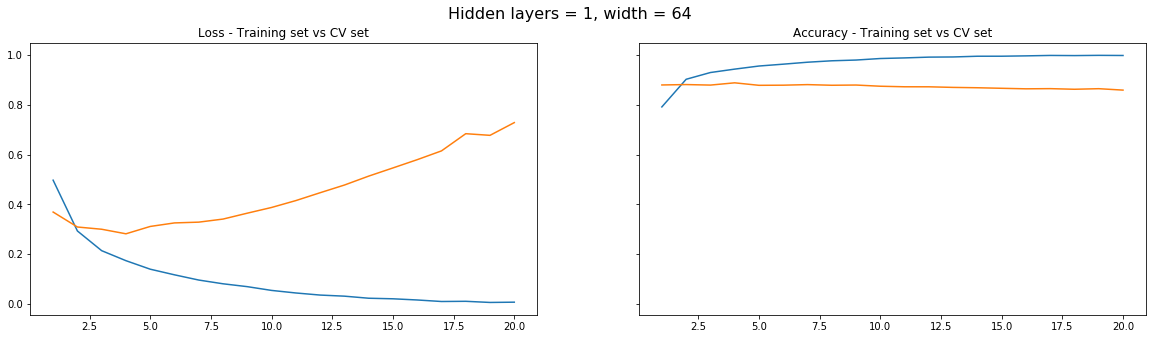

In [114]:
fig = plt.figure(figsize=(5,4))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5),sharey=True)
ax1.plot(epochs,  history_dict['loss'])
ax1.plot(epochs,  history_dict['val_loss'])
ax1.set_title("Loss - Training set vs CV set")
ax2.plot(epochs,  history_dict['binary_accuracy'])
ax2.plot(epochs,  history_dict['val_binary_accuracy'])
ax2.set_title("Accuracy - Training set vs CV set")
plt.suptitle('Hidden layers = 1, width = 64', fontsize=16)